## Perform feature engineering and selection on a dataset by applying feature scaling techniques such as Min-Max scaling and standardisation, using PCA for dimensionality reduction, and implementing at least two feature selection methods like correlation based filtering and chi-square test.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2, SelectKBest
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

print("Original Data Shape:", X.shape)

Original Data Shape: (569, 30)


In [9]:
minmax_scaler = MinMaxScaler()
X_minmax = pd.DataFrame(minmax_scaler.fit_transform(X), columns=X.columns)

In [10]:
std_scaler = StandardScaler()
X_std = pd.DataFrame(std_scaler.fit_transform(X), columns=X.columns)

In [11]:
print("\nData after scaling:")
print(X_minmax.head(2))
print(X_std.head(2))


Data after scaling:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.521037      0.022658        0.545989   0.363733         0.593753   
1     0.643144      0.272574        0.615783   0.501591         0.289880   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.792037        0.703140             0.731113       0.686364   
1          0.181768        0.203608             0.348757       0.379798   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.605518  ...      0.620776       0.141525         0.668310   
1                0.141323  ...      0.606901       0.303571         0.539818   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.450698          0.601136           0.619292         0.568610   
1    0.435214          0.347553           0.154563         0.192971   

   worst concave points  worst symmetry  worst fractal dimension  
0 

In [14]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_std)

print("\nExplained variance ratio by PCA components:", pca.explained_variance_ratio_)
print("Total variance retained:", np.sum(pca.explained_variance_ratio_))


Explained variance ratio by PCA components: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768]
Total variance retained: 0.8473427431680725


In [15]:
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(f"\nHighly correlated features to drop: {to_drop}")

X_corr_filtered = X.drop(columns=to_drop)


Highly correlated features to drop: ['mean perimeter', 'mean area', 'mean concave points', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst concave points']


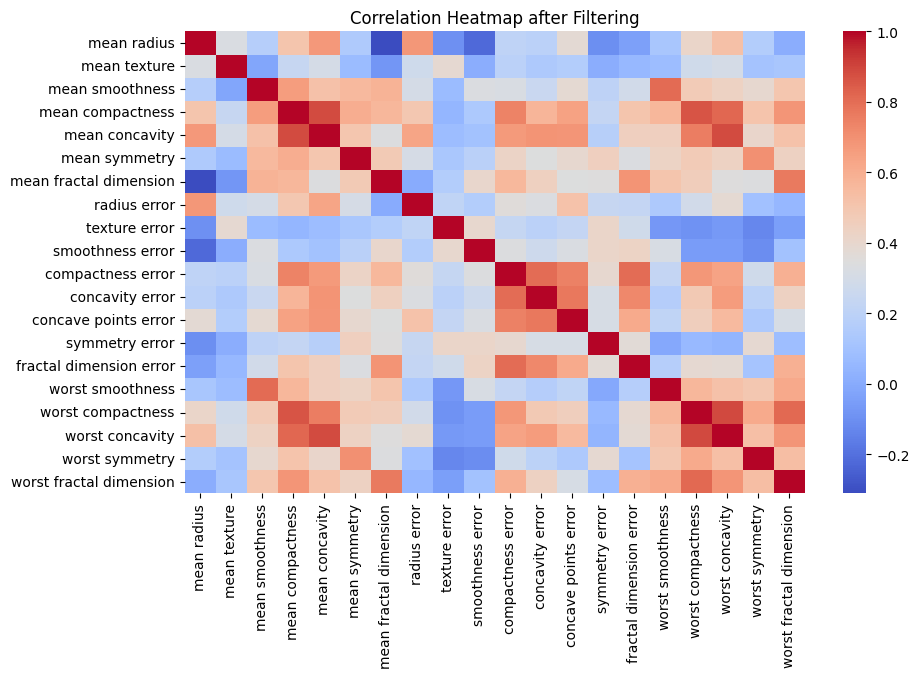

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(X_corr_filtered.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap after Filtering")
plt.show()

In [16]:
chi2_selector = SelectKBest(score_func=chi2, k=10)
X_chi2 = chi2_selector.fit_transform(X_minmax, y)
selected_features = X.columns[chi2_selector.get_support()]
print("\nTop 10 features selected using Chi-Square Test:")
print(selected_features)


Top 10 features selected using Chi-Square Test:
Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points'],
      dtype='object')


In [19]:
set1 = set(X_corr_filtered)
set2 = set(selected_features)

unique_columns_dropped = set1.symmetric_difference(set2)

print("\nUnique columns dropped after filtering:")
print(unique_columns_dropped)


Unique columns dropped after filtering:
{'mean symmetry', 'mean concave points', 'worst radius', 'compactness error', 'worst concave points', 'symmetry error', 'texture error', 'concavity error', 'mean fractal dimension', 'smoothness error', 'worst symmetry', 'concave points error', 'fractal dimension error', 'worst perimeter', 'radius error', 'worst compactness', 'worst fractal dimension', 'mean compactness', 'mean perimeter', 'mean smoothness', 'mean area', 'worst smoothness', 'mean texture', 'worst area'}
